# Instalación de modulos

In [ ]:
#instalando pandas y plotnine
import sys
#!{sys.executable} -m pip install ggplot
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install plotnine

In [ ]:
#importando modulos
import pandas as pd
from plotnine import *
from plotnine.data import midwest

#Viendo una base de datos de juguete
midwest.head(2)

In [ ]:
midwest.columns

# Grammar of graphics

La idea de grammar of graphics es que un gráfico es un conjunto de múltiples componentes gramaticales (capas), donde cada componente del gráfico se puede modificar por separado. Entonces un gráfico es generado por la suma de cada una de estas capas que se van agregando una sobre otra. La principal ventaja es la manipulación de las capas, ya que cada una de ellas se puede manipular en forma independiente.

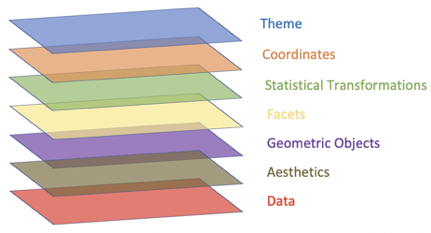

Las diferentes capas se cen carga de disitinos componentes del gráfico:<br>
<ul>
    <li> Data: capa principal, define los datos que vamos a usar..
    <li> Aesthetics: define los ejes a mostrar, posicionamiento de los puntos, tipos de colores y otras características incluyendo tamaño, forma, color.
    <li> Geometric objects: Conocidos como ‘geoms’, definen la forma de mostrar los datos, por ejemplo: puntos,  barra, lineas, …
    <li> Facets: para la generación de subgráficos basado en ciertas dimensiones.
    <li> Statistical transformation: necesarias para mostrar ciertas características de los datos como medidas de tendencia central, dispersión u otras.
    <li> Scale: características de las escalas.
    <li> Theme: manipula todas las características no relacionadas a la apariencia de los datos, por ejemplo: texto, grilla, bordes.
</ul>

# Data layer
La capa de los datos es la más simple de todas, es con lo que comienza el gráfico (ggplot o plotnine.ggplot dependiendo como se hay importado los modulos) y recibe solamente un data frame. Estos datos estarán disponibles para todas las otras capas. Por ejemplo ggplot(midwest)

In [ ]:
ggplot(midwest)

# Aesthetic layer
La capa aesthetic describe las <b>variables</b> de los datos que serán mapeadas según las capas geoms. Esta capa puede ser defininda dentro de la capa datos (ggplot()), como una capa individual, y en otras capas.

Importante, en esta capa, las propiedades son asignadas a variables, no valores. Por lo tanto, la capa en forma inteligente determina como los valores de una vairable serán mapeados en el gráfico. 

Por ejemplo, en ggplot(data=midwest)+aes(x='area', y='poptotal',color='category'), el gráfico determinará en forma inteligente los distintos colores que se asignarán según los valores de la variable category.

In [ ]:
ggplot(data=midwest)+aes(x='area', y='poptotal',color='category')

Las variables más típicas definindas en esta capa son el eje x e y. Sin embargo otroas propiedades también pueden ser definindas (color, size, fill, etc).

Creemos nuestro primer gráfico ggplot, donde las capas se conectan a través del simbolo +.

In [ ]:
midwest.head(3)
#La conexión entre capas es a través del simbolo +
#Data layer    + Aesthetic layer
ggplot(midwest)+aes(x='area', y='poptotal')

In [ ]:
#Agregando la capa geom_point()
(ggplot(midwest)
 +aes(x='area', y='poptotal', color="category", size="popblack")
 +geom_point(shape="D")
)

# Grabando gráficos
Para grabar un gráfico en un archivo, se puede grabar directamente seleccionando la imagen generada, o se puede grabar el gráfico en alguna variable y grabar el gráfico con las características deseadas:

Una vez que un gráfico es generado p=ggplot(midwest)+aes(x='area', y='poptotal')+ geom_point(), la función <font color="blue">p.save()</font> permite grabar el gráfico en nuestro computador.<br>
<font color="blue">p.save(filename, height, width, units, dpi)</font>
<ul>
    <li> filename: nombre del archivo, la entensión del archivo determina el formato a grabar.
    <li> height: altura de la imagen.
    <li> width: ancho de la imagen.
    <li> units: unidades del ancho y alto de la imagen ("in","cm","mm").
    <li> dpi: pixel por unidad.
</ul>

La ventaja de definir la altura y ancho, es que permite modificar los margenes de la imagen.

En caso que quiera mostar el gráfico use print(varGrafico)

In [ ]:
p=ggplot(midwest)+aes(x='area', y='poptotal')+ geom_point()
p.save(filename = "funca.png", height=15, width=5, units = 'in', dpi=1000)
print(p)

# Theme layer
Existen diversas capas que permiten modificar distintas propiedades del gráfico. Una de las más importantes es theme. Ya existen algunas capas predefinidas con ciertas características (hasta es posible definir tu propia capa). Entre las más típicas se encuentran:
<ul>
    <li> theme_gray(): fondo plomo, grilla blanca.
    <li> theme_bw(): fondo blanco, grilla negra.
    <li> theme_light(): fondo blanco, grilla gris.
    <li> theme_dark(): fondo gris oscuro, grilla negra.
    <li> theme_classic(): fondo blanco, sin grilla.
    <li> theme_void(): elimina el fondo, solo se muestra los datos.
</ul>

## Ejercicio, intente usar diferentes capas theme con los datos

In [ ]:
#Escribe tu código acá

------

In [ ]:
#creando un data frame de juego
data = {'group': ["Male", "Female", "Child"],
        'value': [40, 20, 50]
       }
df = pd.DataFrame (data, columns = ['group','value'])
df

# Gráfico de barra acumulada (stacked bar plot)

Los gráficos de barras acumulada (y de barra) son atribuidos a William Playfair en 1781. Un gráfico de barra acumulada es una barra separada en multiples partes, donde la altura de cada parte representa el valor a mostrar y debe ser proporcional al valor que representa. La suma total de las partes es igual al valor total de las partes.

En el gráfico de barra acumulada no “existe” el eje X, y en el eje Y colocamos la variable que queremos mostrar.

### Limitaciones

Un número grande de barras se puede ver desordenado.
Es difícil diferenciar dos barras con valores similares.
No permite una visualización correcta de otras capas, como por ejemplo barras de error. 

### Código 
En el gráfico más simple de barra acumulada, el eje x no se define, y el eje y es la variable a mostrar.

## geom_bar
geom_bar es la capa para gráficos de tipo barra (gráfico de barra acumulada incluido). Los aesthetic (aes) y data son heredados de las capas principales (ggplot y aes).<br>
<font color='blue'>geom_bar(mapping, data, stat, width, position, color, fill, show_legend)</font>
<ul>
    <li>mapping: nuevos aesthetics que se quieran agregar a la capa (aes), normalmente se omite ya que es heredada. 
    <li>data: nuevos datos a mostrar, normalmente se omite ya que es heredada.
    <li>stat: transformación estadística a usar en los datos.
        <ul>
            <li> identity: función identidad (gráfica los valores recibidos)
            <li> count: cuenta cada uno de los posibles valores (variables discretas)
            <li> bin: agrupa los valores en grupos (variables continuas).
        </ul>
    <li>width: valor numérico representando el ancho de la barra.
    <li>position: ajusta la posición de las barras ("stack", "dodge", "fill")
    <li>color: borde del color para cada caja. Puede ser un único valor, o una lista de colores para cada caja.
    <li>fill: color del relleno de la barra de datos. Puede ser un único valor, o una lista de colores para cada caja.
    <li>show_legend: valor booleano indicando si se muestra la leyenda de datos.
</ul>



In [ ]:
#gráfico de barra acumulada
ggplot(df)+aes(x=0,y='value')+geom_bar(stat = "identity",position="stack")

Para agregar relleno a las barras, podemos usar el parametro fill de la capa aes. Este parámetro determina automáticamente el número de colores a rellenar (variable discreta) o la escala de colores (variables numericas).

In [ ]:
#Gráfico de barra acumulada con colores
ggplot(df)+aes(x=0,y='value',fill='group')+geom_bar(stat = "identity",position="stack")

In [ ]:
#Gráfico de barra acumulada con colores, observen como la capa geom_bar se sobrepone a aes.
(ggplot(df)+aes(x=0,y='value',fill='group')+
 #geom_bar(stat = "identity",position="stack",color="black",width=1,fill="#05A4F3"))
 geom_bar(stat = "identity",position="stack",color="black",width=1,fill=["blue","white","red"]))

### Ejercicios

1. Modique las características de geom_bar

In [ ]:
# Escriba aquí su solución

2. Hacer un gráfico de barra acumulada para los 5 países europeos con mayor población en 2017 

(use el archivo "eu-pop-2017.csv")

In [ ]:
euro = pd.read_csv("eu-pop-2017.csv")
euro.head()

In [ ]:
#Escriba su código acá

---------
# Labs layer
Existen tres tipos de títulos que puedes modificados: título del gráfico, de los ejes, o de la leyenda. Todos ellos se pueden defininr con la capa labs.
<font color='blue'>labs(parameter = "texto a mostrar")</font>
<ul>
    <li> title: título del gráfico.
    <li> x: título del eje x.
    <li> y: título del eje y.
    <li> XXX:  título de la leyenda, donde XXX corresponde al parámtro de aes usado para la leyenda.
</ul>

In [ ]:
#Agregando títulos
(ggplot(df)+aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 #Given that we use fill to generate the legend, the same parameter is used to modify the legend.
 +labs(title="Ejemplo de título",x="Todos",y="valores apilados",fill="Categoría") #Este comando agrega los títulos
)

# Theme layer
Existen diversas capas que permiten modificar distintas propiedades del gráfico. Una de las más importantes es theme. Ya existen algunas capas predefinidas con ciertas características (hasta es posible definir tu propia capa). De forma similar, cada parámetro se le asigne un valor o un tipo específico de elemento (element_text, element_line, etc) con sus rpopias características <br>

## plot_title => element_text
El parámetro plot_title, que es un elemento del tipo element_text, nos permite modificar todas las características relacionadas al texto del título.<br>
<font color="blue">theme(plot_title = element_text(size, face, hjust, vjust, angle, lineheight, color))</font>
<ul>
    <li>size: tamaño de la letra.
    <li>face: formato de la letra ("bold", "plain", "italic", "bold.italic").
    <li>ha: ajuste horizontal aplicado al texto ('center', 'left', 'right').
    <li>va: ajuste vertical aplicado al texto ('center' , 'top', 'bottom', 'baseline').
    <li>angle: ángulo del texto.
    <li>lineheight: Espacio entre dos líenas de texto, para agregar una segunda línea use \n.
    <li>color: color del texto (también puede ser un valor hexadecimal de 6 dígitos, representando la escala RGB).
    <li>backgroundcolor: color del fondo.        
    <li>family: tipo de letra.
</ul>


In [ ]:
#Código previo
(ggplot(df)+aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +ggtitle("Title of \nthe plot")
 #definiendo las características del título
 +theme(plot_title=element_text(size=20,face="bold.italic",color="green",backgroundcolor="yellow",angle=20,lineheight=2,va="top",family="Comic Sans MS"))
)

### Ejercicio

Modifique las características de plot_title (element_text) para el gráfico con la población de los países europeos en 2017.

In [ ]:
#Escriba su código aquí

### element_text

Para modificar las caracteristícas de los textos usamos elemen_text, el cual puede ser asociado a las siguientes propiedades (usando la capa theme):
<ul>
    <li> plot_title: título del gráfico.
    <li> axis_title: título de ambos ejes.
    <li> axis_title_x: título del eje x.
    <li> axis_title_y: título del eje y.
    <li> legend_title: título de la leyenda.
    <li> axis_text: texto de ambos ejes.
    <li> axis_text_x: texto del eje x.
    <li> axis_text_y: texto del eje y.
    <li> legend_text: texto de la leyenda.
</ul>
En caso que quieran remover alguna característica, asignenla a element_blank().
   

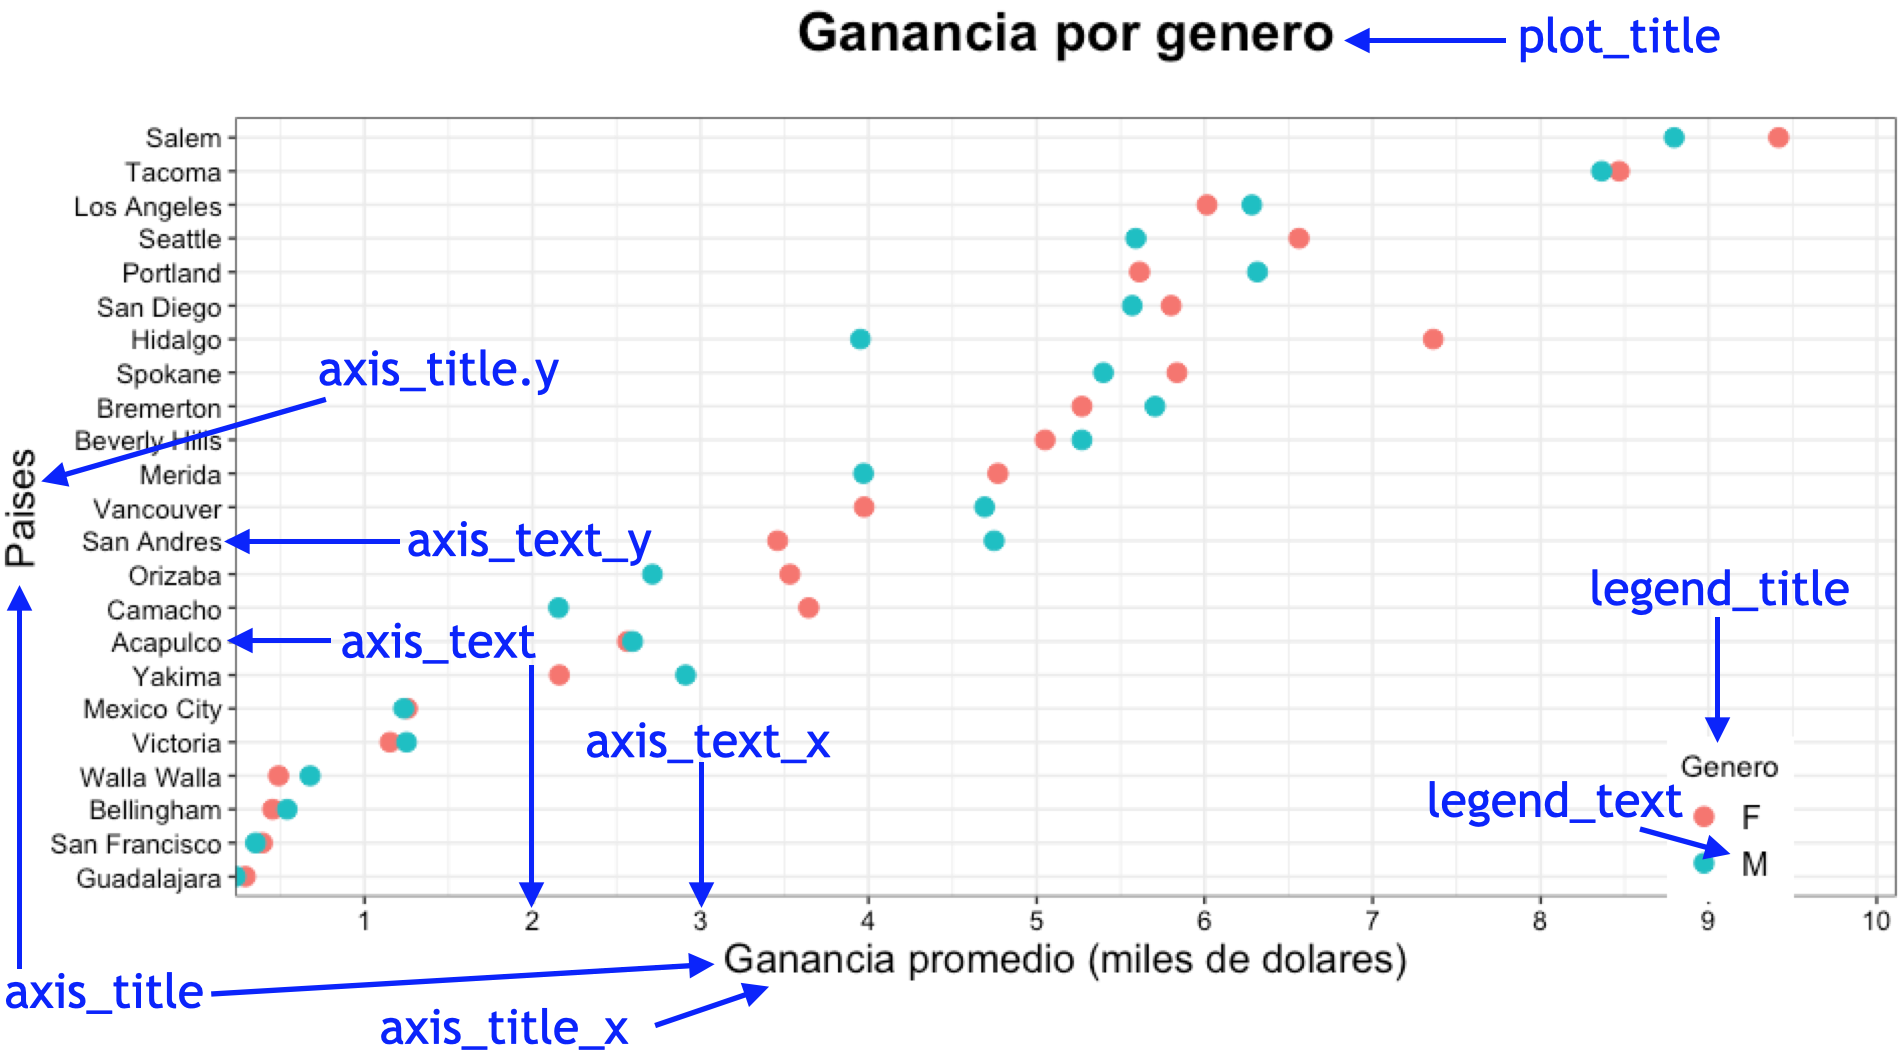


Recuerden, element_text tiene lo siguientes parámetros<br>
<font color="blue">theme(plot_title = element_text(size, face, hjust, vjust, angle, lineheight, color))</font>
<ul>
    <li>size: tamaño de la letra.
    <li>face: formato de la letra ("bold", "plain", "italic", "bold.italic").
    <li>ha: ajuste horizontal aplicado al texto ('center', 'left', 'right').
    <li>va: ajuste vertical aplicado al texto ('center' , 'top', 'bottom', 'baseline').
    <li>angle: ángulo del texto.
    <li>lineheight: Espacio entre dos líenas de texto, para agregar una segunda línea use \n.
    <li>color: color del texto (también puede ser un valor hexadecimal de 6 dígitos, representando la escala RGB).
    <li>backgroundcolor: color del fondo.        
    <li>family: tipo de letra.
</ul>



In [ ]:
#Código antiguo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +ggtitle("Title of the plot")
 +theme(plot_title=element_text(size=30,face="bold.italic",color="red",lineheight=2,va="top",backgroundcolor="yellow"))
 #Modificando las características de texto
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) #Eliminando los textos y título del eje X
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
)

## Ejercicio

Modifique características relacionadas a element_text para la población de los países europeos  en 2017. 

In [ ]:
#Escriba su código acá

### element_line
En forma similar a element_text, existe element_line que nos permite modificar todas las caraterísticas relacionads con líneas. Element_line es bastante sencillo, ya que solo 3 parámtros pueden ser modificados. 

<ul>
    <li> size: tamaño de la línea.
    <li> color: color de la línea.
    <li> linetype: tipo de línea ("solid", "dashed", "dashdot" or "dotted"). Para generación de líneas propias <a href=https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html> presione aquí</a>
</ul>
En caso que quieran remover alguna característica, asignenla a element_blank().
    
Existen tres elementos importantes relacionadas a element_line: ticks, axis, y grids.
<ul>
    <li> axis_ticks: indicador de los valores de los ejes.
    <li> axis_ticks_major: indicador mayor para ambos ejes.
    <li> axis_ticks_minor: indicador menor para ambos ejes.                  
    <li> axis_ticks_major_x: indicador mayor eje x. 
    <li> axis_ticks_minor_x: indicador menor eje x.     
    <li> axis_ticks_major_y: indicador mayor eje y.
    <li> axis_ticks_minor_y: indicador menor eje y.      
    <li> axis_line: líneas de los ejes.
    <li> axis_line_x: línea eje x.
    <li> axis_line_y: línea eje y.
    <li> panel_grid: grilla del gráfico.      
    <li> panel_grid_major: grilla mayor.        
    <li> panel_grid_minor: grilla menor.             
    <li> panel_grid_major_x: grilla mayor eje x.        
    <li> panel_grid_minor_x: grilla menor eje x.             
    <li> panel_grid_major_y: grilla mayor eje y.
    <li> panel_grid_minor_y: grilla menor eje y.                       
</ul>

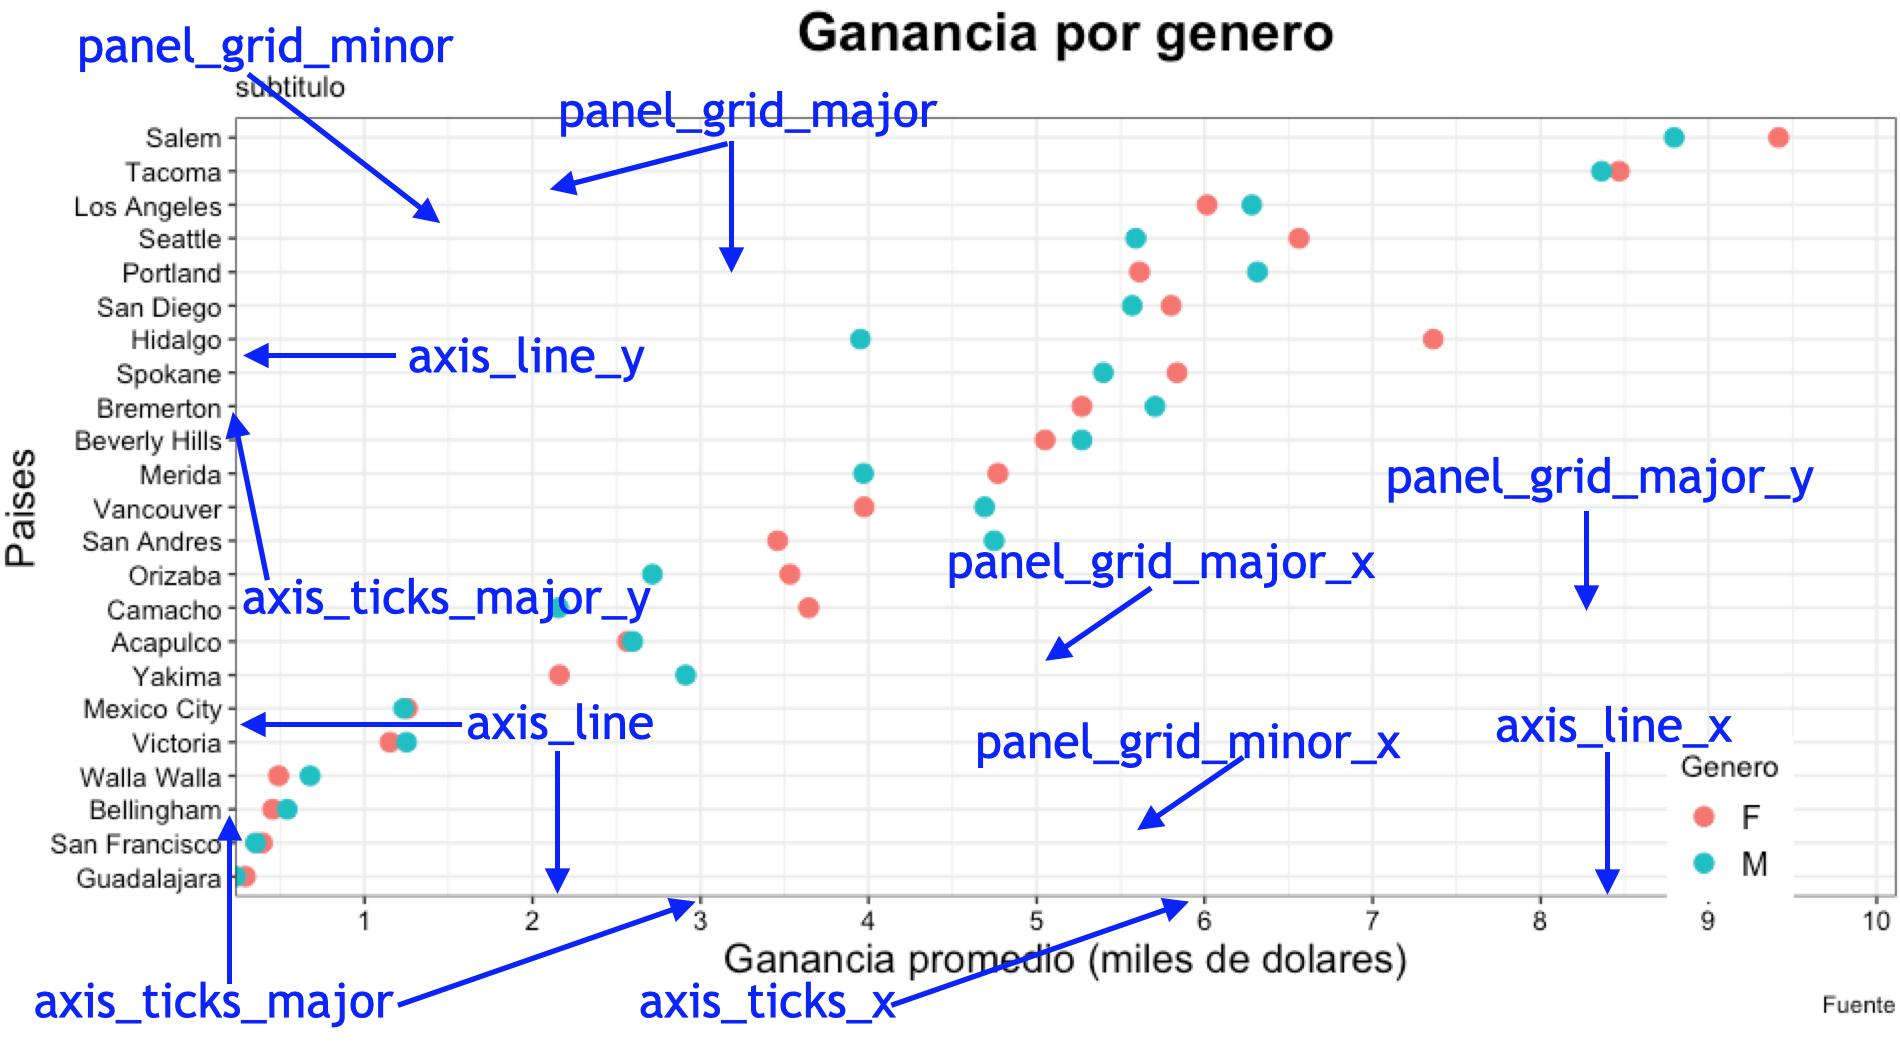

In [ ]:
#Código antiguo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +ggtitle("Title of the plot")
 +theme(plot_title=element_text(size=30,face="bold.italic",color="red",lineheight=2,va="top",backgroundcolor="yellow"))
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) # Removiendo el título y el texto del eje x
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 #Nuevo código modificando propiedades de línea
 +theme(axis_line_x=element_blank())
 +theme(panel_grid_major_x=element_line(size=2,color="red",linetype="dashed"))
)

### Ejercicio

Haga el siguiente gráfico

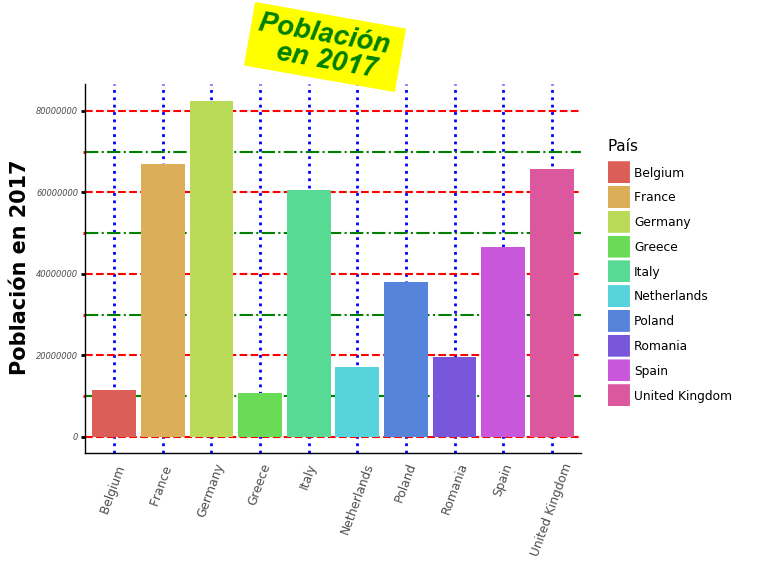

In [ ]:
#Escriba su código acá

### element_rect
Similar a element_text y element_line, existe element_rect que permite modificar las caracteristicas de los elementos relacionados a rectángulos. Element_rect es sencillo ya que solo 4 parámetros pueden ser modificados. 


<ul>
    <li> size: tamaño de la línea.
    <li> color: color de la línea.
    <li> fill: relleno del rectángulo (en caso de ser posible).        
    <li> linetype: tipo de línea ("solid", "dashed", "dashdot" or "dotted"). Para generación de líneas propias <a href=https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html> presione aquí</a>
</ul>
En caso que quieran remover alguna característica, asignenla a element_blank().

Lo siguientes elementos pueden ser modificados con element_rect.
<ul>
    <li> panel_border: bordes de la grilla (donde los datos son desplegados).
    <li> panel_background: fondo de la grilla.
    <li> plot_background: todo el rectángulo de la imagen.                        
    <li> legend_background: fondo de la leyenda.     
    <li> legend_key: fondo de lo símbolos de la leyenda.
</ul>

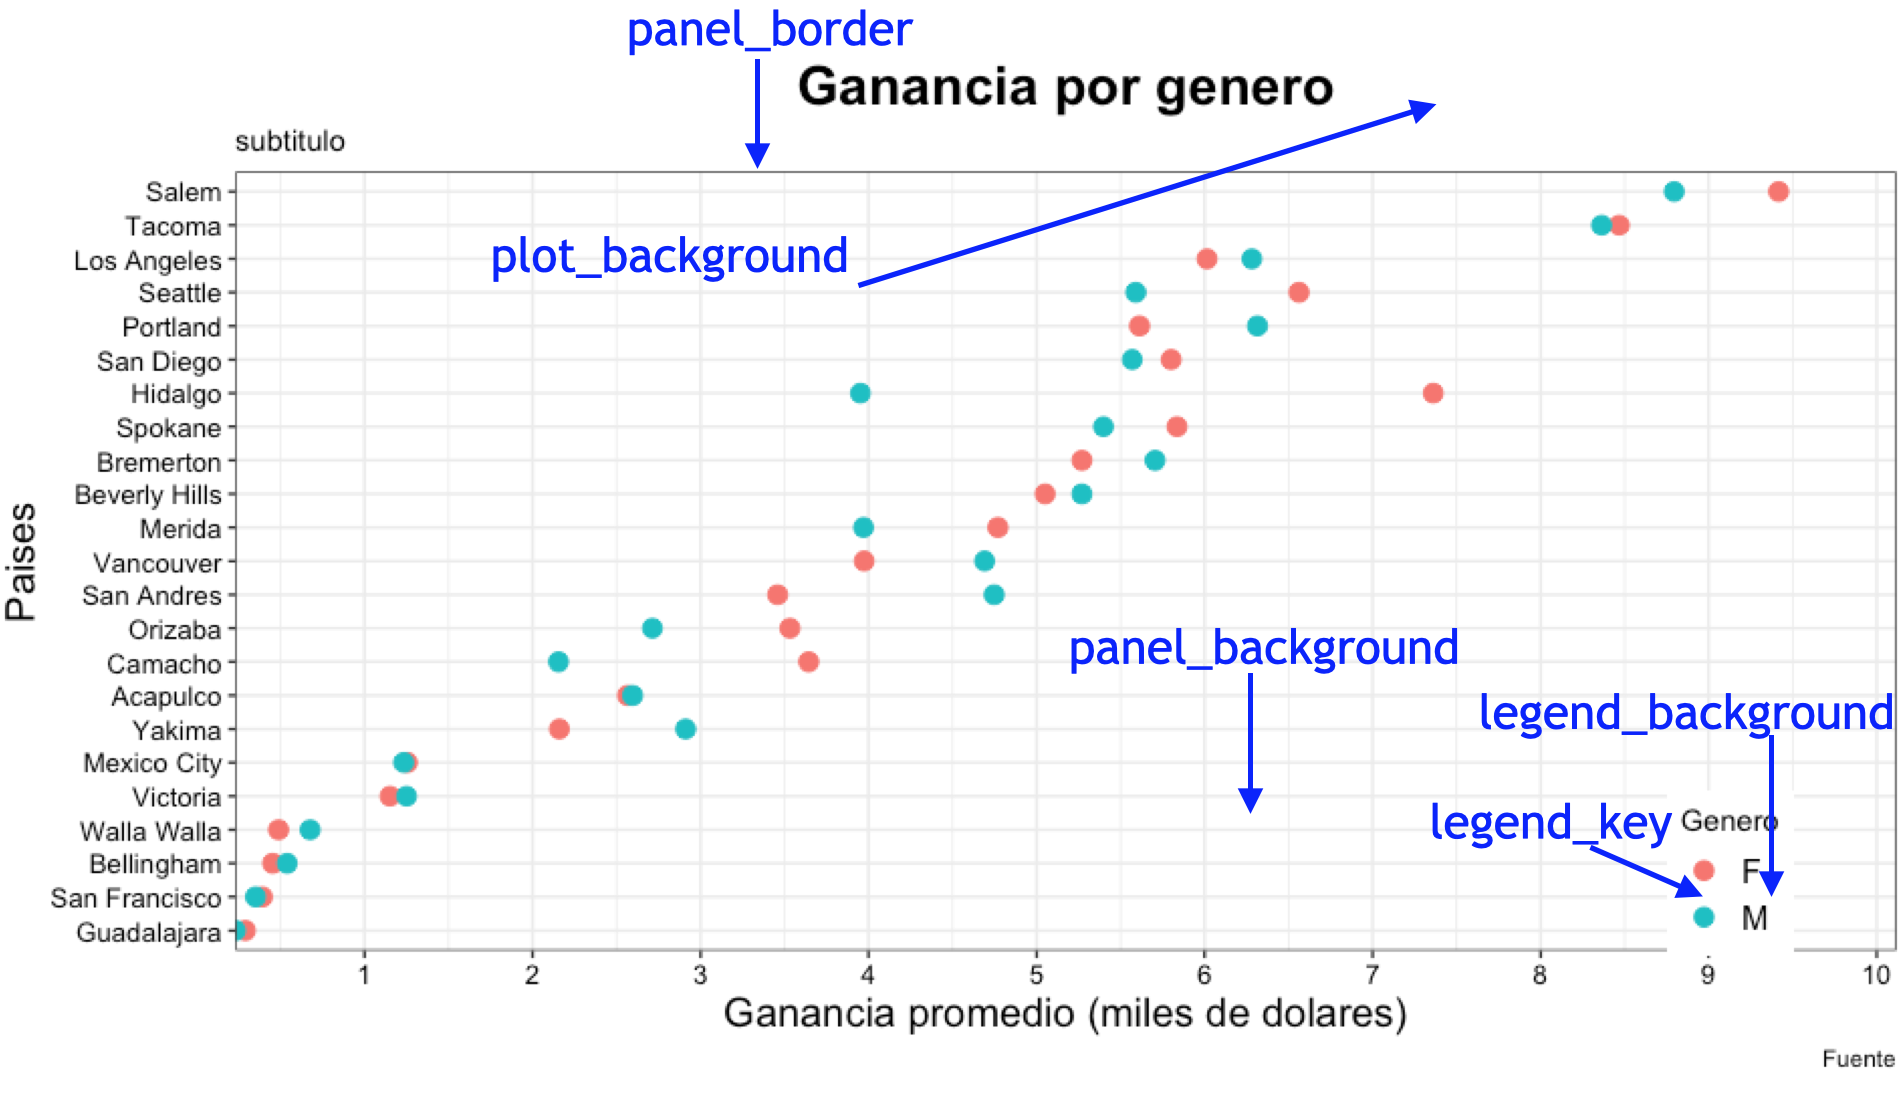    

In [ ]:
#Código antiguo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +ggtitle("Title of the plot")
 +theme(plot_title=element_text(size=30,face="bold.italic",color="red",lineheight=2,va="top",backgroundcolor="yellow"))
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) # Removiendo el título y el texto del eje x
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank())
 #Nuevo código para modificar las características de los rectángulos
 +theme(legend_key=element_rect(size=2,color="blue",fill="red",linetype="dashed"))
)

## Ejercicio: 

Genere el siguiente gráfico

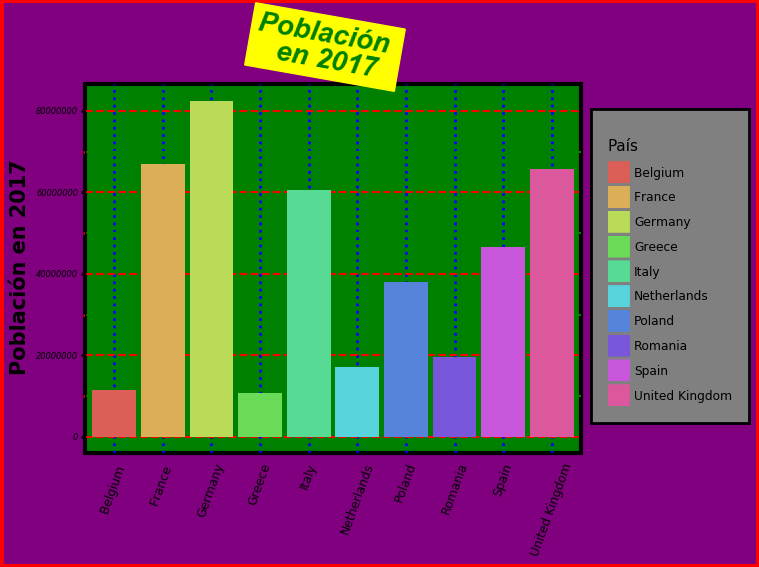

In [ ]:
#Escriba su código acá

# Scale layer

Scale layer modifica las escalas de los plots, existen diez tipos de escalas distintas (cinco por eje), que definen la escala y las carateristicas a usar: 
* scale_y_discrete, 
* scale_y_continuous, 
* scale_x_discrete, 
* scale_x_continuous, 
* scale_x_log10, 
* scale_x_sqrt, 
* scale_x_reverse, 
* scale_y_log10, 
* scale_y_sqrt, 
* scale_y_reverse.

Lo siguientes elementos pueden ser modificados: 
<ul>
    <li>name: otra manera de cambiar el título del eje.
    <li>limits: lista con los límites del eje, o el orden en caso de una variable discreta.
    <li>breaks: lista con los ticks a mostrar.
    <li>labels: lista con los nombre que aparecerán en los ticks a mostrar (tiene que se del mismo tamaño que la lista de breaks).        
    <li>expand: expansión multiplicativa o aditiva a los límites de los ejes. Se debe especificar 4 valores, en el siguiente orden [mul_low, add_low, mul_high, add_high]<br>
        mul = x: agrega un porcentaje igual a (x*100)% a la parte superior o inferior.<br>
        add = x: agrega x unidades a la parte inferior o superior.
</ul>


In [ ]:
#Codigo previo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1,show_legend=False)
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) # Removiendo el título y el texto del eje x
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank(), axis_ticks=element_blank())
 # Modificando la escala del eje y
 +scale_y_reverse(name="new title",limits=[0,110],breaks=[0,10,40,70,100],labels=["hola","0",50,10,100],expand=[0,20,0,20])
)

### Ejercicio

Generar el siguiente gráfico

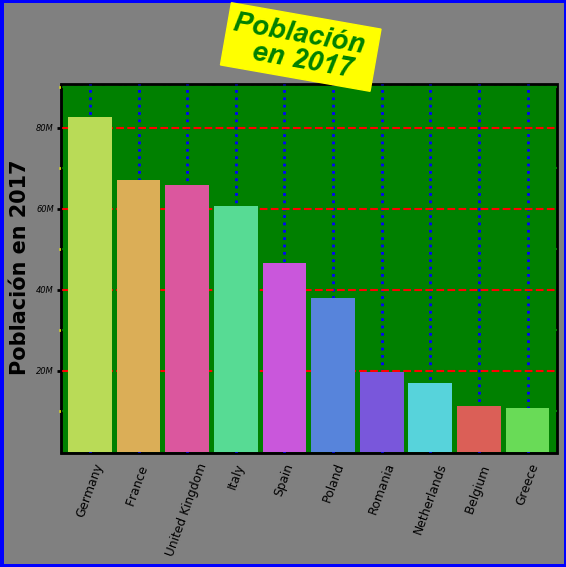

In [ ]:
#Escriba su código acá

## Legends
Existen distintas formas de modificar las caracteristcias relacionadas a la leyenda, desde su posición a su color. Recordemos los comandos previos :
<ul>
    <li> theme(legend_title=element_text(...)): título de la leyenda 
    <li> theme(legend_text=element_text(...)): texto de la leyenda 
    <li> theme(legend_background=element_rect(...)): fondo de la leyenda.
    <li> theme(legend_key=element_rect(...)): fondo de los símbolos de la leyenda.
</ul>
   

### legend_position
legend_position es la propiedad relacionada a la posición de la leyenda en el gráfico. <br>
<font color="blue">theme(legend_position = string o tupla)</font><br>
En el caso de un string, usar: "right", "left", "top", "bottom", or "none".<br>
En el caso de una tupla, debe ser dos valores entre 0 y 1 especificando la posición de la leyenda en el gráfico, donde (0,0) es la parte inferior izquierda y (1,1) es la parte superior derecha.

En el caso de "none" la leyenda es eliminada.

In [ ]:
#Código previo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) #Removing the title and text from the x-axis
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank(), axis_ticks=element_blank())
#Código de leyenda
 +theme(legend_key=element_rect(size=2,color="blue",fill="red",linetype="dashed"))
 +theme(legend_position=(0.95,0.4))
)


# Scale layer (para leyendas)

Las leyendas son generadas en forma automática segun las características usada en la capa aes ("color", "fill", "size", "etc"). Para cambiar los colores de la leyenda en forma manual, se puede usar la capa scale_XXX_manual, donde XXX corresponde a la característica utilizada. Veamos un ejemplo

### scale_fill_manual
<font color="blue">scale_fill_manual(values,breaks,labels)</font><br>
<ul>
    <li> values: Lista de colores a utilizar para la leyenda.
    <li> breaks: Define los valores y el orden a mostrar de la leyenda, pero no cambia el orden del gráfico.
    <li> labels: Nuevo texto para cambiar en la leyenda.
</ul>
 
Atención, en el caso de un gráfico de puntos, el color de los puntos es definido por color, por lo cual se debe utilizar scale_color_manual.

In [ ]:
#Código anterior
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1)
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) 
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank(), axis_ticks=element_blank())
 +theme(legend_key=element_rect(size=2,color="blue",fill="red",linetype="dashed"))
 +theme(legend_position=(0.95,0.4))
 #Cambiando las características de la leyenda
 +scale_fill_manual(values=["purple","#aa2144","black"],breaks=["Female","Male","Child"],labels=["Woman","Man","Child"])
)

# Evitando leyendas
Una de las reglas básicas de visualización es evitar las leyendas, y en caso que no se pueda, incluirlas dentro del gráfico. 

## annotate()
La capa annotate agrega un texto sencillo en el gráfico, indicandole la posición del texto.<br>
<font color="blue">annotate("text",x,y,label,size,color,alpha,angle,...)</font><br>
<ul>
    <li>"text": indica que se agregará texto.
    <li>x/y: posición de las coordenadas x e y.
    <li>label: texto a a agregar.        
    <li>size: tamaño del texto.                
    <li>color: color del texto.
    <li>alpha: valor entre 0 y 1, indicando el nivel de transparencia del texto.        
    <li>angle: ángulo del texto.
    <li>family: tipo de fuente.        
</ul>


In [ ]:
#Código previo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1,show_legend=False)
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) #Removing the title and text from the x-axis
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank(), axis_ticks=element_blank())
 +theme(legend_key=element_rect(size=2,color="blue",fill="red",linetype="dashed"))
 +scale_fill_manual(values=["purple","#aa2144","black"],breaks=["Female","Male","Child"],labels=["Woman","Man","Child"])
 #Agregando un nuevo texto
 +annotate("text",x=0,y=50,label="woman",size=20,color="white",angle=10,alpha=0.5,family="arial")
)

## geom_text()
La capa geom_text es una capa del tipo geom. por lo tanto despliega todos los datos recibidos, en este caso despliega un texto por punto. Por lo tanto, hay que tener cuidado al utilizarlo.
<font color="blue">geom_text(x,y,label,size,color,alpha,angle,...)</font><br>
<ul>
    <li>x/y: heredados del llamado inicial. Caso contrario, debe ser un vector con el mismo tamaño de los valores inciales (cada punto debe terne su propia posición).
    <li>label: heredado de la capas inciales. Caso contrario, debe ser un vector con el mismo tamaño de los valores inciales con los textos a mostrar.
    <li>size: tamaño del texto.                
    <li>color: color del texto.
    <li>alpha: valor entre 0 y 1, indicando el nivel de transparencia del texto.        
    <li>angle: ángulo del texto.
    <li>family: tipo de fuente.        
    <li>position: un objecto de la clase position_stack(hjust=float number, vjust= float number)
</ul>
Si label tiene un único valor, este valor es replciado para cada punto del gráfico.<br>
Si X/y es un único valor, todos los textos (el número de puntos) son replicados en una misma posición.

position_stack automáticamente determina los valores de los datos en su posición correcta. El parámetro hjust/vjust es un número entre 0 y 1, indicando un ajuste horizontal/vertical de los valores. 

In [ ]:
#Código antiguo
(ggplot(df)
 +aes(x=0,y='value',fill='group')
 +geom_bar(stat = "identity",position="stack",color="black",width=1,show_legend=False)
 +theme(axis_text_x=element_blank(),axis_title_x=element_blank()) #Removing the title and text from the x-axis
 +theme(axis_title_y=element_text(size=20,color="blue",family="arial")) 
 +theme(axis_line_x=element_blank(), axis_ticks=element_blank())
 +theme(legend_key=element_rect(size=2,color="blue",fill="red",linetype="dashed"))
 +scale_fill_manual(values=["purple","#aa2144","black"],breaks=["Female","Male","Child"],labels=["Woman","Man","Child"])
 #agregando nuevo texto 
 +geom_text(label=["man","woman","child"],size=20,color="white",position = position_stack(vjust = 0.5))
)


### Ejercicio

Genere los siguientes gráficos

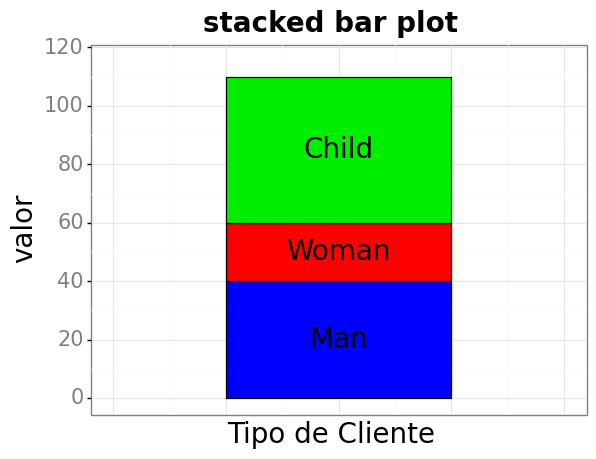


In [ ]:
#Escribe tu solución aquí

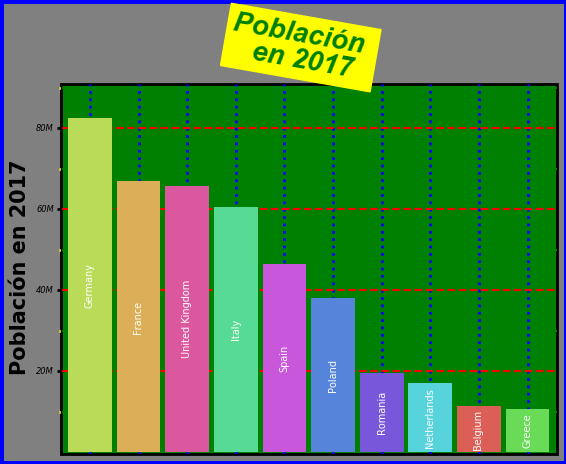

In [ ]:
#Escriba su código acá

------
La mayoría de los datos vienen en forma de vector o matriz. Generamos el mismo set de datos y veamos como cambian las instrucciones.


In [ ]:
#Generando un vector de datos y desordenandolo
import random
temp=["Male"]*40+["Female"]*20+["Child"]*50
random.shuffle(temp)

#creating a data frame 
data = {'values': temp}
df2 = pd.DataFrame (data, columns = ['values'])

#Accesing value variable of the data frame 
print(df2)
print(df.iloc[0,:])

Ya no es posible usar las mismas líneas de código, debido a las siguientes líneas:<br>
<font color="blue">ggplot(df)+aes(x=0,y='value',fill='group')</font>: "value" y "group" no existen, y no tenemos un eje y<br> 
<font color="blue">+geom_bar(stat = "identity",position="stack",color="black",width=1,show_legend=False)</font>: stat="identity" ya no es una opción, tenemos que contar los datos.

Nota: geom_text ya no es útil ya que mostraría 110 textos en el gráfico.

In [ ]:
#nuevo código
(ggplot(df2)
 +aes(x="values",fill="values") #Seteando la variable a count, para contar los valores
 +geom_bar(aes(x=0),stat = "count",position="stack",color="black",width=1) 
)

In [ ]:
(ggplot(df2,aes(x="values",fill="values")) 
 +geom_bar(aes(x=0),stat = "count",position="stack",color="black",width=1, show_legend=True) 
 +theme_bw()
 +labs(title="stacked bar plot",x="Tipo de Cliente",y="valor")
 +theme(plot_title = element_text(size = 20, face="bold", hjust=0.5))  
 +theme(axis_title = element_text(size = 20))
 +theme(axis_text_y = element_text(size = 15, color="gray"))
 #+scale_x_continuous(limits=[-1,1]) 
 +theme(axis_text_x = element_blank())
 +theme(axis_ticks_minor_y = element_blank())  
 +theme(axis_ticks_minor_x = element_blank()) 
 +theme(axis_ticks_major_x = element_blank())
 #+scale_y_continuous(limits=[0,115], labels=list(range(0,121,20)),breaks=list(range(0,121,20)))
 +scale_fill_manual(values = ["#00EE00","red","blue"])
 +geom_text(aes(x=0, label="values"), stat="count", color=["white","black","black"], position = position_stack(vjust = 0.5)) 
)

# Bar plot

Creado en 1781 por William Playfair, los gráficos de barras muestran una barra separada para cada tipo de datos (datos categóricos), donde la altura de cada barra representa el valor a mostrar. Los gráficos de barra permiten una fácil comparación entre sus elementos, ya que todas las barras parten de un valor común, el valor cero.

### tips
No usar leyenda, los ejes X e Y ya tienen suficiente información.<br>
Colores de barra distintos no dan información, excepto que quieran recalcar alguna barra en particular o que se vea más "bonito".<br>
Para facilitar la comparación ordenar los valores de menor a mayor.<br>
Siempre partir desde cero para no perder percepción.<br>
Utilice la escala de valores y no agregue los valores de la barra. Excepto, cuando sea imperativo mostrar el valor preciso (de igual manera se "puede" usar la escala), o querer destacar valores.<br>
Gráfico de barras horizontal mejora la comparación, el ojo ve mejor las diferencias entre las barras.<br>
Barras angostas son más cómodas de ver para el ojo.

### Limitaciones
En presencia de mucho datos, los gráficos de barra se ven atestados y/o desordenados.<br>
No permiten la correcta visualización de barras de error (desviación estándar por ejemplo).

### Código
En el gráfico de barra hay que definir el eje x y el eje y. El eje x define cada una de las distintas variables a mostrar, mientras que el eje y el valor a desplegar. Otra capa interesante es coord_flip(), que nos permite cambiar las coordenadas del gráfico (girar en 90 grados el gráfico.

## geom_bar()
geom_bar es la capa para gráficos de tipo barra (gráfico de barra acumulada incluido). Los aesthetic (aes) y data son heredados de las capas principales (ggplot y aes).<br>
<font color='blue'>geom_bar(mapping, data, stat, width, position, color, fill, show_legend)</font>
<ul>
    <li>mapping: nuevos aesthetics que se quieran agregar a la capa (aes), normalmente se omite ya que es heredada. 
    <li>data: nuevos datos a mostrar, normalmente se omite ya que es heredada.
    <li>stat: transformación esatdística a usar en los datos.
        <ul>
            <li> identity: función identidad (gráfica los valore recibidos)
            <li> count: cuenta cada uno de los posibles valores (variables discretas)
            <li> bin: agrupa los valores en grupos (variables continuas).
        </ul>
    <li>width: valor numérico representando el ancho de la barra.
    <li>position: ajusta la posición de las barras ("stack", "dodge", "fill")
    <li>color: borde del color para cada caja. Puede ser un único valor, o una lista de colores para cada caja.
    <li>fill: color del relleno de la barra de datos. Puede ser un único valor, o una lista de colores para cada caja.
    <li>show_legend: valor booleano indicando si se muestra la leyenda de datos.
</ul>



In [ ]:
#Obteniendo datos
data = pd.read_csv("tasaFertilidad2019vsGPD.csv") 

#Agregando una nueva columna para indicar si el pais es estable  (fertility rate sobre 2.1)
#data.insert(indexNewColum,nameColumn,data)
data.insert(len (data.columns),"stable",data["TasaFertilidad"]>2.1)
tempData=data.sample(30)

(ggplot(tempData.sort_values("TasaFertilidad"))
 +aes(x="Pais",y="TasaFertilidad")
 +geom_bar(stat="identity")
 +coord_flip() #Comente esta línea y compare
)

## Ejercicio: genere el siguiente gráfico

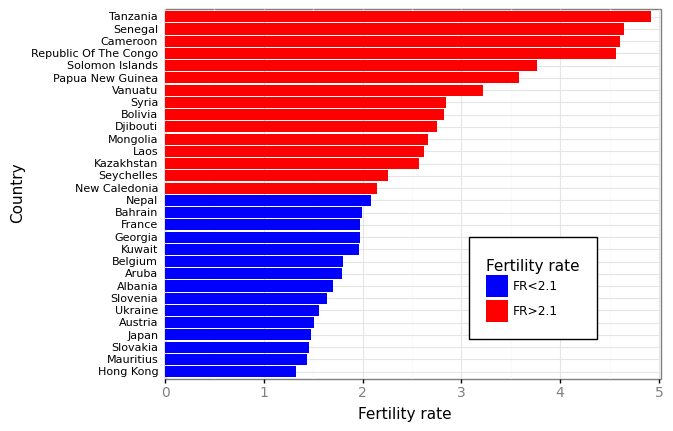



In [ ]:
#Agrega tu código acá

# Cleveland plot

Los gráficos de Cleveland fueron creados en 1984 por William Cleveland. Estos gráficos so una mejor del gráfico de barras, donde los datos categóricos van en el eje vertical, los valores en el eje horizontal, y se usa puntos en vez de barra. Al tener una escala común horizontal, nos permite una mejor comparación de la posición de los datos. Además, como ya no se compara áreas, no es necesario partir desde el valor 0.


## geom_point()
<font color="blue"> geom_point(mapping, data, stat, position, show_legend,…)</font> es la capa para puntos de un gráfico.<br>
<ul>
    <li>mapping: nuevos aesthetics que se quieran agregar a la capa (aes), normalmente se omite ya que es heredada. 
    <li>data: nuevos datos a mostrar, normalmente se omite ya que es heredada.
    <li>stat: transformación estadística a usar en los datos.
        <ul>
            <li> identity: función identidad (gráfica los valore recibidos)
            <li> count: cuenta cada uno de los posibles valores (variables discretas)
            <li> bin: agrupa los valores en grupos (variables continuas).
        </ul>
    <li>position: posición de los puntos (heredado de los datos)
    <li>color: color de los puntos, puede ser un puro valor o un vector de valores (uno para cada punto).
    <li>size: Tamaño del punto, puede ser un puro valor o un vector de valores (uno para cada punto).
    <li>show_legend: valor booleano indicando si se muestra la leyenda de datos.
    <li>alpha: transparencia de los puntos, valor entre 0 y 1 o un vector de valores (uno para cada punto).
    <li>shape: forma del punto, un valoe entero entre 0 y 11 o un caracter (puede ser un vector también). Para una lista de formas <a href="https://plotnine.readthedocs.io/en/stable/_modules/plotnine/scales/scale_shape.html"> presione aquí</a>.
    <li>fill: color de relleno para algunas formas.
</ul>



In [ ]:
#Cargando los datos
data = pd.read_csv("tasaFertilidad2019vsGPD.csv") 

#Agregando una nueva columna para indicar si el pais es estable  (fertility rate sobre 2.1)
#data.insert(indexNewColum,nameColumn,data)
data.insert(len (data.columns),"stable",data["TasaFertilidad"]>2.1)
if 'tempData' not in globals():
    tempData=data.sample(30)

(ggplot(tempData)
 +aes(y="Pais",x="TasaFertilidad")
 +geom_point(color="red",size=3.4,alpha=0.5,shape="D",fill="blue")
)
#Observe como el valor 0 ya no es necesario.

## Ejercicio:

Genere un grafico de Cleveland con los mismos datos del ejercio anterior.

In [ ]:
# Escriba aquí su solución

# Gráfico de línea
Un gráfico de linea muestra una linea que conecta una serie de puntos de una variable con respecto a otra variable ordinal (normalmente el tiempo). Uno de los primeros gráficos de linea se remonta a un autor anónimo, entre los siglos 10 y 11, que lo utilizó para observar los movimientos planetarios. Ya en 1767, Johann Lambertwas comenzó a utilizarlos en forma regular.

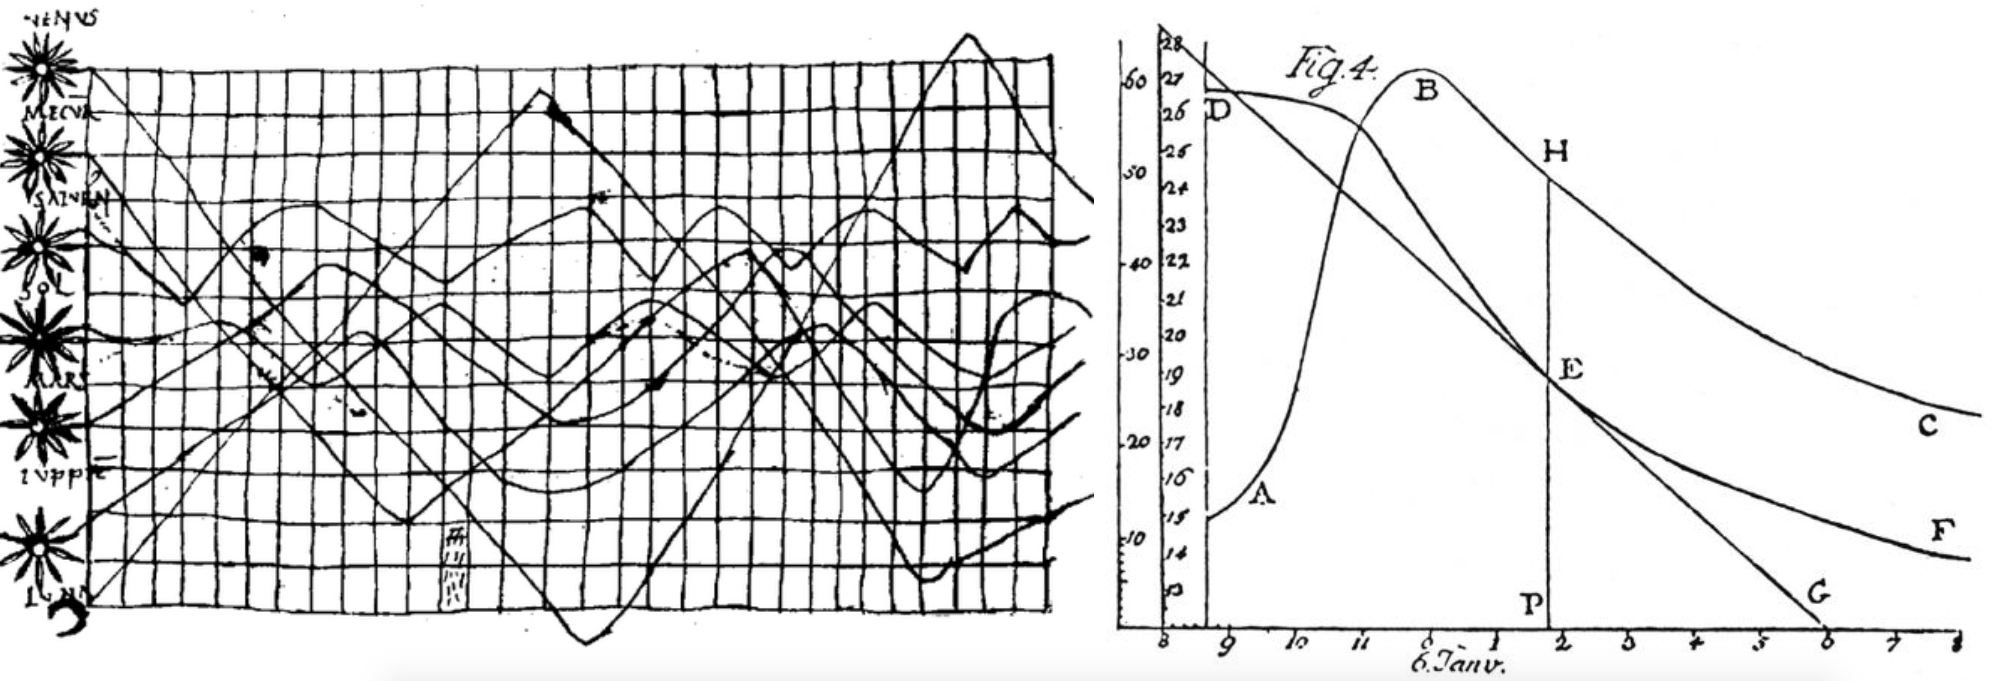

Un gráfico de línea muestra una linea que conecta varios puntos con respecto a ua variable ordinal. El eje X muestra la variable ordinal y el eje Y muestra el valor de los datos. Aunque normalmente el tiempo es utilziado en el eje x, otro tipos de variables también pueden ser (temperatura, edad, distancia recorrida). Su principal ventaja es la visualización de tendencias en los datos, siendo mayormente usado en series de tiempo.

Dentro de los errores más comunes está:
1. Uso de intervalos discontinuos en el eje X. 
2. Su uso para variables no ordinales en el eje X.

### Limitaciones
Al haber una sola línea no sabemos cuantos datos hay exactamente. Podrían haber desde 10 datos (quiebres en la línea) a infinitos datos.<br>
En el caso de tener pocos datos, la unión entre dos puntos consecutivos puede no representar el verdadero comportamiento de los datos.

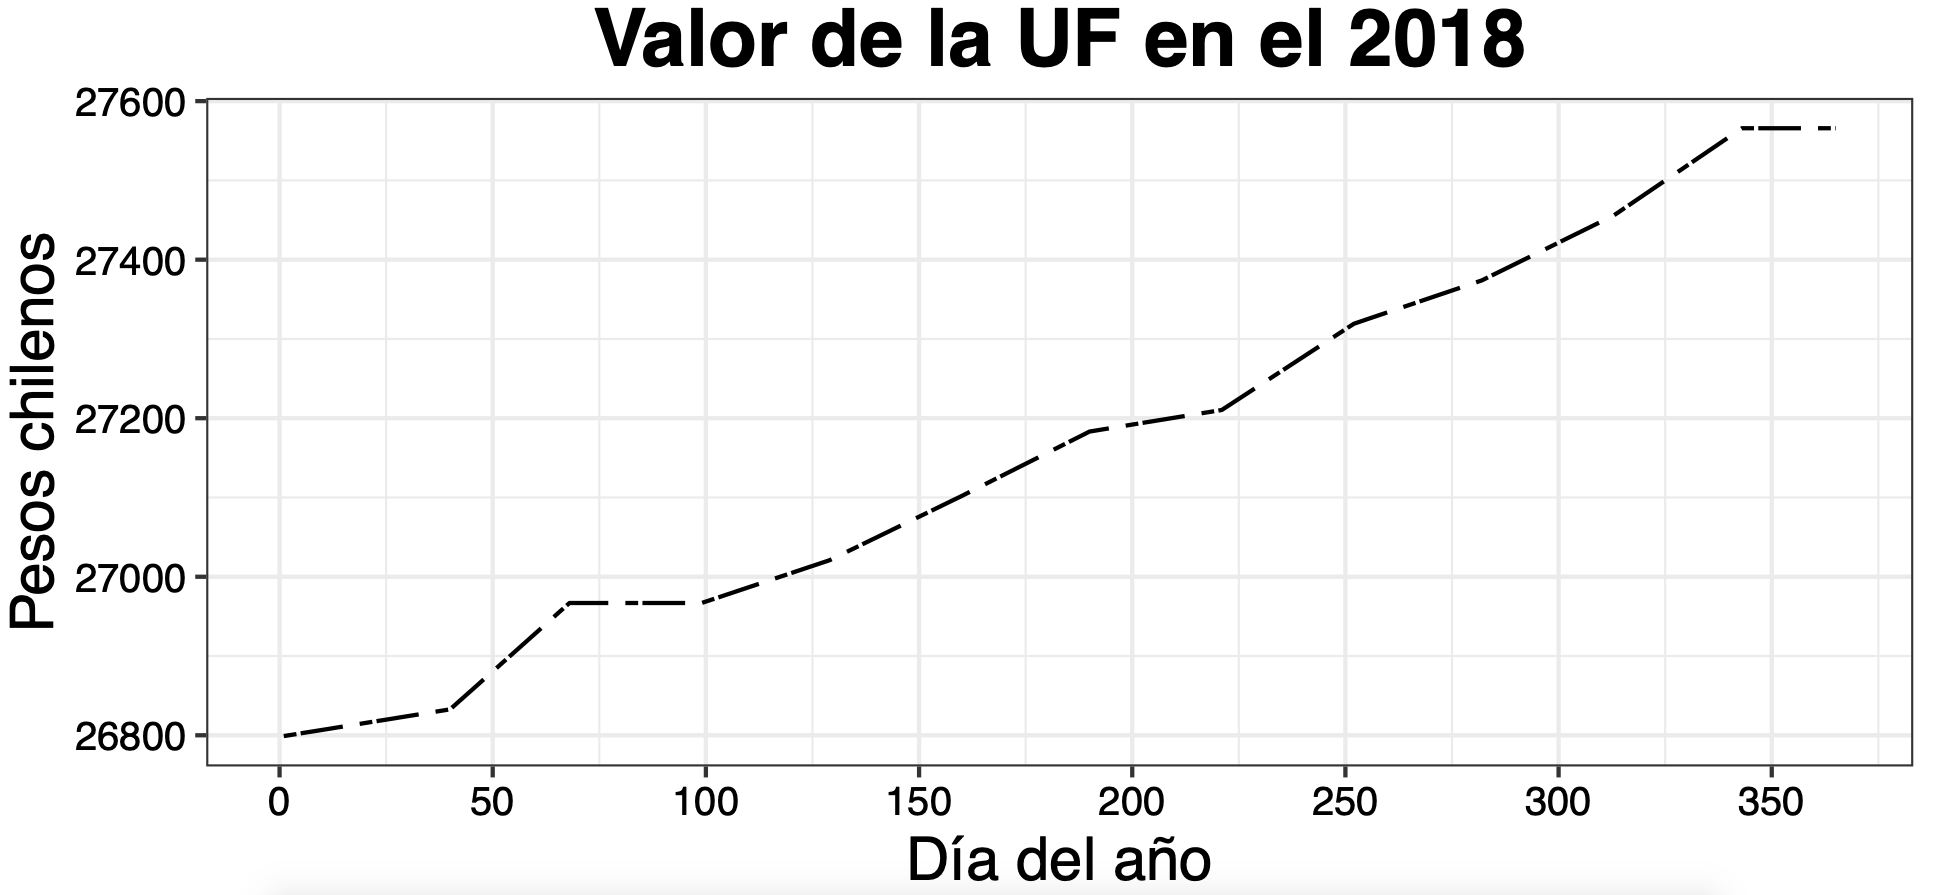

### Código 
El gráfico de línea se genera con la capa <font color="blue">geom_line()</font>, donde el eje x es la variable ordinal, y el eje y es la variable con los datos. 

## geom_line()
<font color="blue"> geom_line(mapping, data, show.legend, color, size, alpha, linetype, arrow,…)</font>
<ul>
    <li>color: color de la linea.
    <li>size: tamaño de la línea.
    <li>alpha: transparencia de la línea.        
    <li>linetype: tipo de línea entre: "solid", "dashed", "dashdot" or "dotted". Para generar una línea particular <a href=https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html>presione aquí</a>.
    <li>arrow: agrega una flecha, definido por arrow(angle, ends, length, type), se puede usar para mostrar la dirección de los datos.
        <ul>
            <li> angle: ángulo en grados entre la cola y el eje (no el ángulo de la cabeza).
            <li> length: largo de la arista en "inches".
            <li> ends: define donde dibujar la flecha ('last', 'first', 'both').
            <li> types: define el tipo de flecha "open" o "closed"
        </ul>
</ul>


In [ ]:
#leyendo los datos
data = pd.read_csv("UF2018dia.csv") 

#Gráfico de línea
(ggplot(data)
 +aes(x="Dia",y="ValorUF")
 +geom_line(linetype="dashed",color="blue",arrow=arrow(angle=20,length=0.2,type="closed"))
)

# Proporción del aspecto

La proporción del aspecto es la proporción entre la altura del rectángulo de datos contra su ancho. Considerando que el humano puede distinguir mucho mejor un ángulo cercano a 45°, se busca que las orientaciones de las líneas de segmento estén centradas en 45°, y de esta forma se puede apreciar mejor la información.

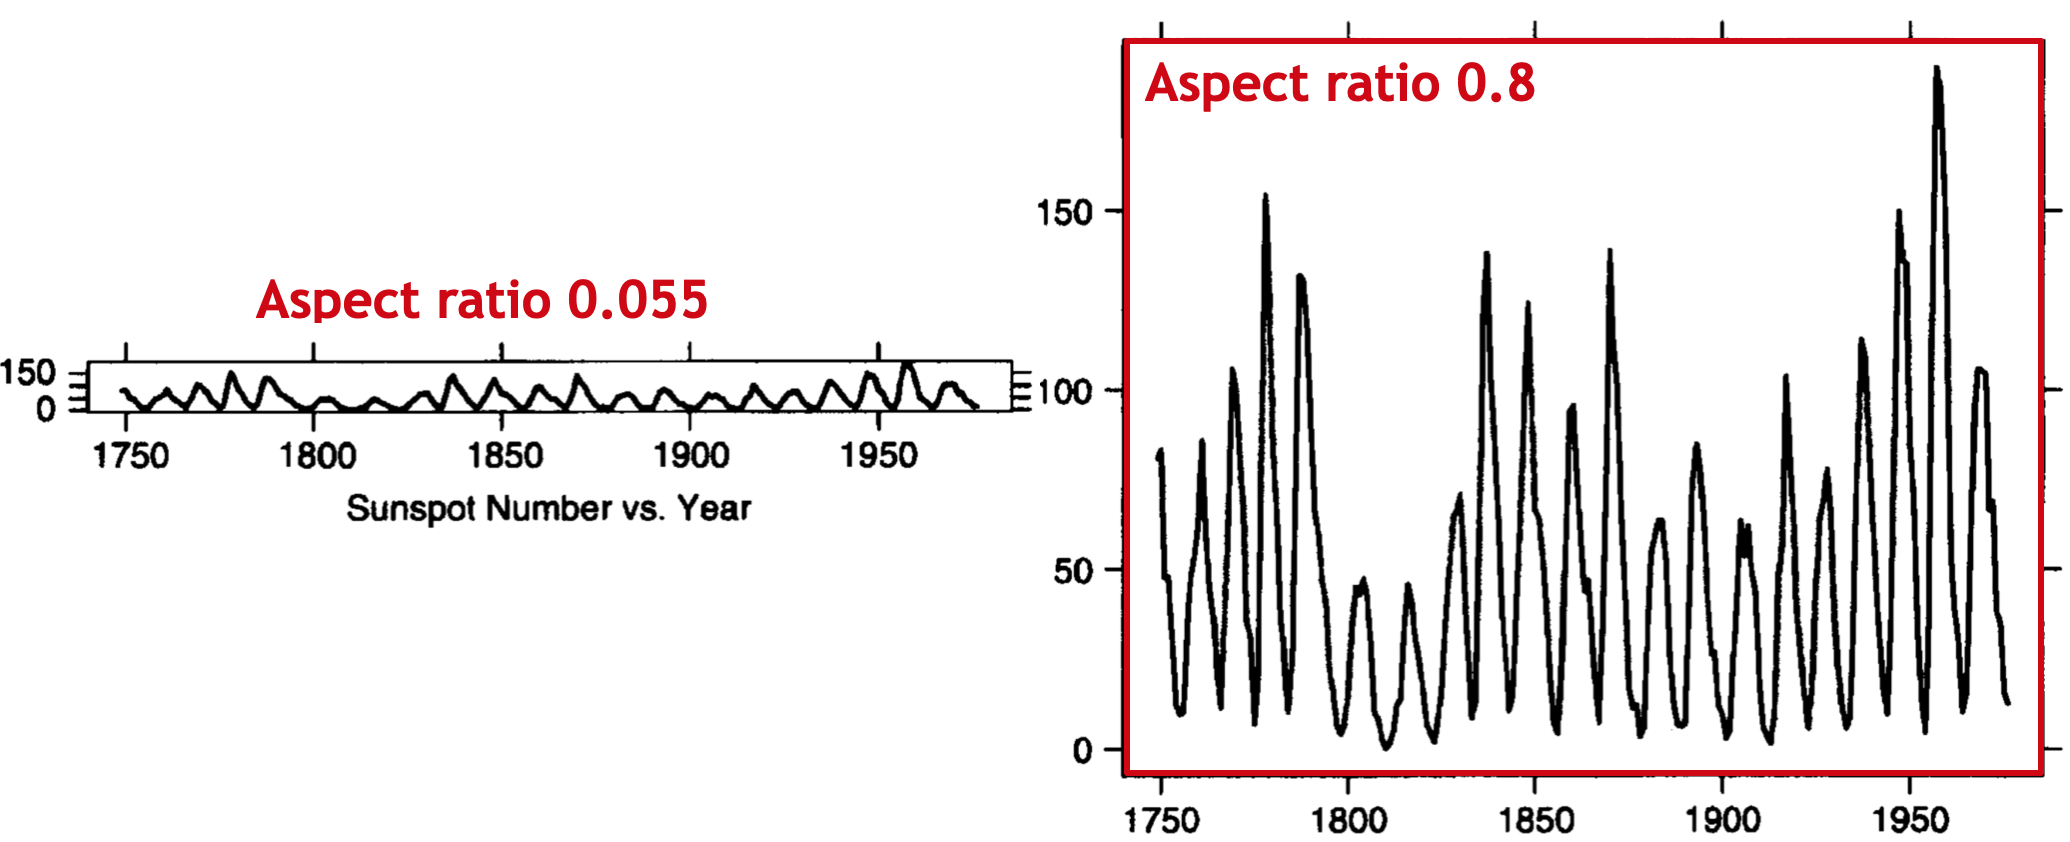

Desafortunamdamente, plotnine no tiene una manera simple de manejar esta proporción. La forma más sencilla es crear un gráfico y cambiar los margenes (width y height) cuando se grabe en un archivo. Recordemos como se graban los gráficos.

# Grabando gráficos
Para grabar un gráfico en un archivo, se peude grabar directamente seleccionando la imagen generada, o se puede grabar el gráfico en alguna variable y grabar el gráfico con las características deseadas:

Una vez que un gráfico es generado p=ggplot(midwest)+aes(x='area', y='poptotal')+ geom_point(), la función <font color="blue">p.save()</font> permite grabar el gráfico en nuestro computador.<br>
<font color="blue">p.save(filename, height, width, units, dpi)</font>
<ul>
    <li> filename: nombre del archivo, la entensión del archivo determina el formato a grabar.
    <li> height: altura de la imagen.
    <li> width: ancho de la imagen.
    <li> units: unidades del ancho y alto de la imagen ("in","cm","mm").
    <li> dpi: pixel por unidad.
</ul>

La ventaja de definir la altura y ancho, es que permite modificar los margenes de la imagen.

In [ ]:
#leyendo los datos
data = pd.read_csv("UF2018dia.csv") 

#Graabndo gráficos y ajustando el margen
p=(ggplot(data)
 +aes(x="Dia",y="ValorUF")
 +geom_line(linetype="dashed",color="blue",arrow=arrow(angle=20,length=0.2,type="closed"))
)
p.save("example1.png", height=10, width=20, units="cm", dpi=100)
p.save("example2.png", height=30, width=20, units="cm", dpi=100)

# Comparando categorias

La coparación entre líneas depende de los datos.

Asumamos datos matriciales, donde tenemos una variable ordinal y varias variables numéricas. En este caso, solo necesitamos cambier los aes dentro de cada geom_line, y agregar la leyenda como texto con la capa annotate. 

Asumamos que cada línea de dato tiene una variable ordinal, un valor, y una categoría (day: 1, price: 400, country: "Chile"; day: 1, price: 850, country: "Colombia"). En este caso, solo necesitamos agregar color en la capa principal de aes.

In [ ]:
#Leyendo los datos
data = pd.read_csv("currencyER.csv") 

data.head(2)
#Primer método
(ggplot(data)
 +aes(x="Day")
 +theme_bw()
 +labs(x="Day",y="Currency with respect to US dollar")
 +geom_line(aes(y="Chilean Peso"),color="blue")
 +annotate("text",x=3000,y=900,label="Chile",color="blue",size=15)
 +geom_line(aes(y="Colombian Peso"),color="red")
 +annotate("text",x=3300,y=3000,label="Colombia",color="red",size=15) 
)

In [ ]:
#Leyendo los datos
data = pd.read_csv("currencyER.csv") 

data.head(2)
tempDF1=data[["Day","Chilean Peso"]]
tempDF1=tempDF1.rename(columns={"Chilean Peso": "Value"})
tempDF1.insert(2,"Country",["Chile"]*len(data))

tempDF2=data[["Day","Colombian Peso"]]
tempDF2=tempDF2.rename(columns={"Colombian Peso": "Value"})
tempDF2.insert(2,"Country",["Colombia"]*len(data))

newData=pd.concat([tempDF1,tempDF2])
newData.head(2)


#Segundo caso
(ggplot(newData)
 +aes(x="Day",y="Value",color="Country")
 +theme_bw()
 +labs(x="Day",y="rate to dollar")
 +geom_line()
 +labs(x="Day",y="Currency with respect to US dollar") 
)

# Comparando categorias

Muchas veces los datos tienen características que deseamos comparar. Por ejemplo, comparemos las ganacias promedios de mujeres y hombres en distintas ciudades. Para este tipo de comparaciones necesitamos ordenar los datos según algún criterio. La mayor ventaja, es que basta solo unos pequeños cambios para poder generar estos gráficos.


In [ ]:
#Extrayendo los datos
data = pd.read_csv("SupermarketTransactions.csv") 
data.head(5)

In [ ]:
#Creando una variable para ordenar los datos
tempData=data.groupby(['City']).sum()
tempData=tempData.sort_values("Revenue")
listCities=list(tempData.index)

#Meetodo 1, BARRAS ACUMULADAS
(ggplot(data)
 +aes(x="City",y="Revenue",fill="Gender")
 +geom_bar(stat="identity")
 +coord_flip()
 +scale_x_discrete(limits=listCities) 
)
#Se puede comparar fácilmente la ganancia de los hombres y el total, pero no entre ellos.
#Es prácticamente imposible determinar los valores de cada ciudad para cada Mujer.
#En general un gráfico de barra acumulada casi nunca se debería utilizar en este tipo de comparaciones.


In [ ]:
#Creando una variable para ordenar los datos
tempData=data.groupby(['City']).sum()
tempData=tempData.sort_values("Revenue")
listCities=list(tempData.index)

#Generando el data frame a graficar
tempData=data.groupby(['City','Gender']).sum()
tempData=tempData.reset_index()

#Método 2, BARRAS HORIZONTALES
(ggplot(tempData)
 +aes(x="City",y="Revenue",fill="Gender")
 +geom_bar(stat="identity",position="dodge")
 +coord_flip()
 +scale_x_discrete(limits=listCities) 
)
#El gráfico de barra nos permite comparar fácilmente entre hombres y mujeres.
#Las barras pueden utilizar mucho espacio del gráfico (imaginen si cada barra fuera cercana a $9000).
#Es complicado comparar barras lejanas.

In [ ]:
#Creando variables para ordenar los datos
tempData=data.groupby(['City']).sum()
index=data["Gender"]=="M"
tempData2=data[index]
tempData2=tempData2.groupby(['City']).sum()
tempData3=tempData2["Revenue"]/tempData["Revenue"]
tempData3=tempData3.sort_values()
listCities=list(tempData3.index)
listCities

#Método 3, barras acumuladas de porcentajes
(ggplot(data)
 +aes(x="City",y="Revenue",fill="Gender")
 +geom_bar(stat="identity",position="fill")
 +coord_flip()
 +scale_x_discrete(limits=listCities) 
)
#Se puede comparar fácilmente quien contribuyo más entre el hombre y la mujer.
#No permite saber las ciudades con mayor ganancia.
#No podemos saber la cantidad de dinero que generó cada uno.
#Ordenarlos por país con mayor ganancia no hace sentido.


In [ ]:
#Creando variables para ordenar los datos
tempData=data.groupby(['City']).sum()
tempData=tempData.sort_values("Revenue")
listCities=list(tempData.index)

#Generando un nuevo data frame
tempData=data.groupby(['City','Gender']).sum()
tempData=tempData.reset_index()

#Método 4, CLEVELAND PLOT
(ggplot(tempData)
 +aes(y="City",x="Revenue",fill="Gender")
 +geom_point()
 +scale_y_discrete(limits=listCities) 
)
#El gráfico de Cleveland muestra los valores en el mismo eje, facilitando la comparación entre hombres y mujeres.
#Facilita la comparación entre ciudades.
#Al no comenzar desde 0, no habría problemas con comparar valores cercanos entre ellos.
#Sin embargo, no podemos comparar los valores totales (pero pueden ser agregados)


## Ejercicio: Genere el siguiente gráfico
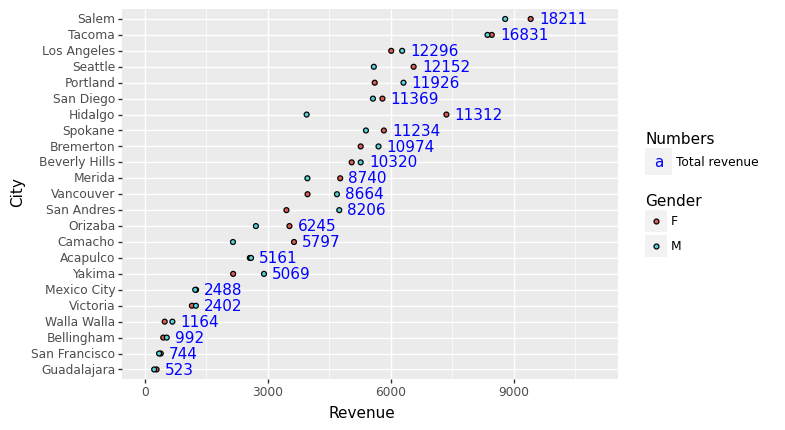

In [ ]:
#Agregue su código aquí